# Übung 2 Raphael Kropp

### Dateiinformation
Die Vergleichstests wurden mit der output.wav Datei durchgeführt. Die Datei ist eine Minute lang und verwendet die Frequenzen 42, 420 und 4200.

### Systeminformation
Die Tests wurden auf einem Notebook mit Intel Core i9 13900HX und einer NVidia GeForce RTX 4070 8GB ausgeführt.

## Aufgabe 1 Python 

In [1]:
%%python
import os 
import sys
sys.path.append(os.path.join(os.path.dirname(__name__), '.'))
sys.path.append(os.path.join(os.path.dirname(__name__), 'A1'))
sys.path.append(os.path.join(os.path.dirname(__name__), 'A3'))
sys.path.append(os.path.join(os.path.dirname(__name__), 'A4'))

## Aufgabe 1 Python

In [2]:
%%python
from A1 import A1Python

sample_rate, audio_data = A1Python.read_wave_file('./Audios/output.wav')
durationA1Python = A1Python.calculate(audio_data, sample_rate, block_size=256, offset=1, threshold=1_000_000)
print(durationA1Python)

Frequency: 0.00 Hz, Amplitude: 1641160.11
Frequency: 344.53 Hz, Amplitude: 1029072.78
Frequency: 4134.38 Hz, Amplitude: 1105567.05
8.284553050994873


## Aufgabe 1 Mojo

In [3]:
import A1.A1Mojo as A1Mojo
from python import Python, PythonObject
from complex import ComplexFloat64

var readwav = Python.import_module("utils.utils")

var input = readwav.read_wave_file('./Audios/output.wav')
var sample_rate = input[0].to_float64()
var data_input = input[1]
var audio = A1Mojo.ndarray_to_complexlist(data_input)

var ampA1 = A1Mojo.amplitude(256 // 2, audio, sample_rate, 256, 1)
var durationA1Mojo = A1Mojo.calculate(ampA1, 256, 1000000)
print(durationA1Mojo)

Freq:  0.0  :  1641160.1144910036
Freq:  344.53125  :  1029072.7470971501
Freq:  4134.375  :  1105567.0263031418
255.89522617


## Aufgabe 3 Python

In [4]:
%%python
from A3 import A3Python

durationA3Python = A3Python.calculate(audio_data, sample_rate, block_size=256, offset=1, threshold=1_000_000)
print(durationA3Python)

Cores used: 32
Frequency: 0.00 Hz, Amplitude: 1641159.91
Frequency: 344.53 Hz, Amplitude: 1029072.75
Frequency: 4134.38 Hz, Amplitude: 1105567.05
1.312391996383667


## Aufgabe 3 Mojo

In [5]:
import A3.A3Mojo as A3Mojo

var inputA3 = readwav.read_wave_file('./Audios/output.wav')
var sample_rateA3 = input[0].to_float64()
var data_inputA3 = input[1]
var audioA3 = A3Mojo.ndarray_to_complexlist(data_input)

var ampA3 = A3Mojo.ParallelFft(audio, sample_rate, 256, 1)
durationA3Mojo = A3Mojo.calculate(ampA3, 1000000)
print(durationA3Mojo)

Freq:  0.0  :  1640871.0886665527
Freq:  344.53125  :  1028804.1556153116
Freq:  4134.375  :  1104516.9023475153
48.426688403999997


## Aufgabe 4 Python

In [6]:
%%python
from A4 import A4Batch

durationA4Python = A4Batch.calculate(audio_data, sample_rate, block_size=256, offset=1, threshold=1_000_000, batch_size=55296)
print(durationA4Python)

Batchgröße:  55296
Frequency: 0.00 Hz, Amplitude: 1641160.11
Frequency: 344.53 Hz, Amplitude: 1029072.78
Frequency: 4134.38 Hz, Amplitude: 1105567.05
1.1822559833526611


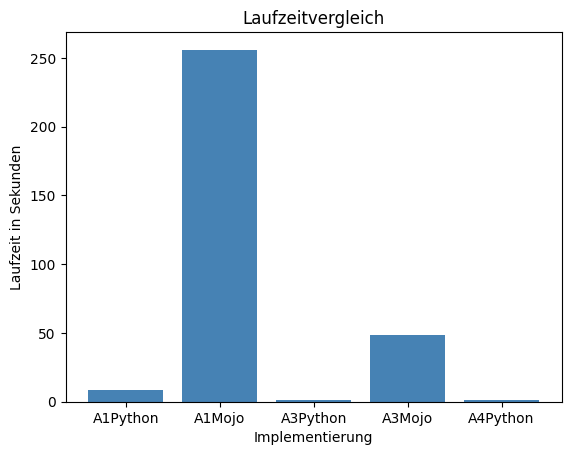

In [7]:
plt = Python.import_module('matplotlib.pyplot')

var dauer: PythonObject = Python.list()
dauer.append(durationA1Python)
dauer.append(durationA1Mojo)
dauer.append(durationA3Python)
dauer.append(durationA3Mojo)
dauer.append(durationA4Python)
var labels: PythonObject = Python.list()
labels.append('A1Python')
labels.append('A1Mojo')
labels.append('A3Python')
labels.append('A3Mojo')
labels.append('A4Python')

plt.bar(labels, dauer,color='steelblue')

plt.xlabel('Implementierung')
plt.ylabel('Laufzeit in Sekunden')
plt.title('Laufzeitvergleich')
plt.show()

## Vergleich zwischen Python A3 und A4
Zum Vergleich der Laufzeiten wurde die Parallel- und Grafikkartenimplenentierung auf einer 10 minütigen Audiodatei mit den Frequenzen 42, 420 und 4200 getestet und verglichen.

In [8]:
%%python
print('seriell')
sample_rate, audio_data = A1Python.read_wave_file('./Audios/sound10minutes.wav')
durationA1Python10m = A1Python.calculate(audio_data, sample_rate, block_size=1024, offset=1, threshold=1_000_000)
print(durationA1Python10m, '\n')

print('parallel')
durationA3Python10m = A3Python.calculate(audio_data, sample_rate, block_size=1024, offset=1, threshold=1_000_000)
print(durationA3Python10m, '\n')

print('grafikbeschleunigt')
durationA4Python10m = A4Batch.calculate(audio_data, sample_rate, block_size=1024, offset=1, threshold=1_000_000, batch_size=55296)
print(durationA4Python10m, '\n')


seriell
Frequency: 43.07 Hz, Amplitude: 5680271.66
Frequency: 387.60 Hz, Amplitude: 1688562.34
Frequency: 430.66 Hz, Amplitude: 5128267.45
Frequency: 473.73 Hz, Amplitude: 1018961.71
Frequency: 4134.38 Hz, Amplitude: 1184162.51
Frequency: 4177.44 Hz, Amplitude: 3444567.31
Frequency: 4220.51 Hz, Amplitude: 3789016.70
Frequency: 4263.57 Hz, Amplitude: 1222348.95
205.89144015312195 

parallel
Cores used: 32
Frequency: 43.07 Hz, Amplitude: 5680271.66
Frequency: 387.60 Hz, Amplitude: 1688562.34
Frequency: 430.66 Hz, Amplitude: 5128267.45
Frequency: 473.73 Hz, Amplitude: 1018961.71
Frequency: 4134.38 Hz, Amplitude: 1184162.51
Frequency: 4177.44 Hz, Amplitude: 3444567.31
Frequency: 4220.51 Hz, Amplitude: 3789016.70
Frequency: 4263.57 Hz, Amplitude: 1222348.95
18.853911876678467 

grafikbeschleunigt
Batchgröße:  55296
Frequency: 43.07 Hz, Amplitude: 5680271.66
Frequency: 387.60 Hz, Amplitude: 1688562.34
Frequency: 430.66 Hz, Amplitude: 5128267.45
Frequency: 473.73 Hz, Amplitude: 1018961.71
Fre

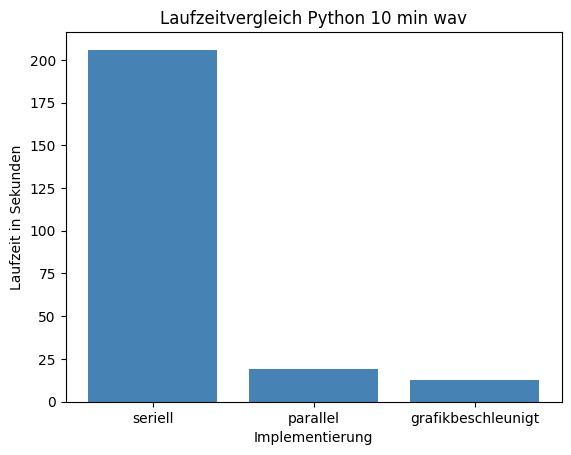

In [9]:
var dauer10m: PythonObject = Python.list()
dauer10m.append(durationA1Python10m)
dauer10m.append(durationA3Python10m)
dauer10m.append(durationA4Python10m)

var labels10m: PythonObject = Python.list()
labels10m.append('seriell')
labels10m.append('parallel')
labels10m.append('grafikbeschleunigt')

plt.bar(labels10m, dauer10m, color='steelblue')

plt.xlabel('Implementierung')
plt.ylabel('Laufzeit in Sekunden')
plt.title('Laufzeitvergleich Python 10 min wav')
plt.show()